# Import networkx and matplotlib.pyplot in the project file.

In [1]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

# Create graph using edgelist from edge_list.txt file

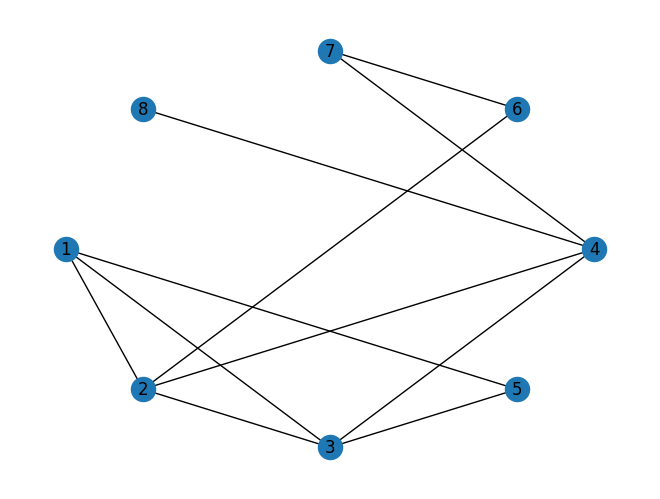

In [3]:
#  Undirected graph
G = nx.read_edgelist('./data/edge_list.txt')
nx.draw(G, pos=nx.shell_layout(G),with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G),with_labels = True)
# Directed graph
# G = nx.read_edgelist('edge_list.txt', create_using=nx.DiGraph())

# Check edges


In [3]:
G.edges()

EdgeView([('1', '2'), ('1', '3'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '6'), ('3', '4'), ('3', '5'), ('4', '7'), ('4', '8'), ('6', '7')])

# 1. Degree Centrality

In [4]:
#Check the degree of node 3
G.degree('3')

4

## Degree centrality: variance and Freeman

variance: 3.9375
Freeman: 1.0


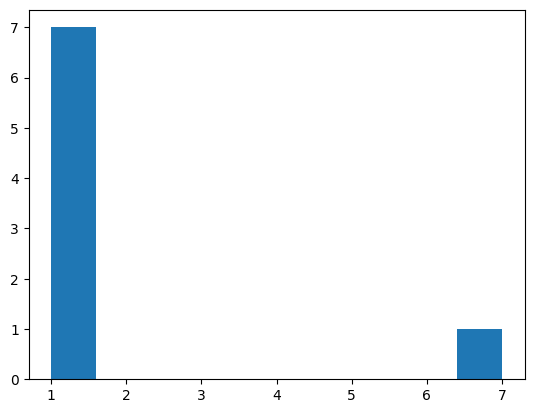

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(1, 0),(1, 2),(1, 3),(1, 5),(1, 4),(1, 6),(1, 7)])
#Degree plot for undirected and weighted graph
degrees = [G.degree(n) for n in G.nodes()]

#degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)
mean = sum(degrees) / len(degrees)

v_start = max(degrees)
n = len(degrees)
var = sum((i - mean) ** 2 for i in degrees) / n
freeman = sum((v_start - i) for i in degrees) / ((n-1)*(n-2))
print(f'variance: {var}')
print(f'Freeman: {freeman}')

## Histogram degree plot


(array([1., 0., 0., 3., 0., 0., 1., 0., 0., 3.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

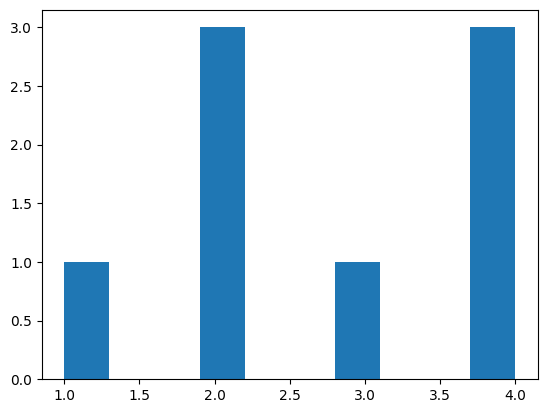

In [5]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

## Degree sequence 

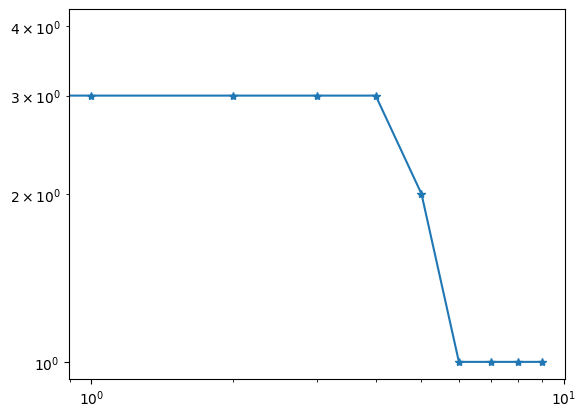

In [26]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

## Degree centrality for unweighted graph


In [7]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'1': 0.42857142857142855,
 '2': 0.5714285714285714,
 '3': 0.5714285714285714,
 '5': 0.2857142857142857,
 '4': 0.5714285714285714,
 '6': 0.2857142857142857,
 '7': 0.2857142857142857,
 '8': 0.14285714285714285}

## Sort for identifying most inflential nodes using degree centrality


In [8]:
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

2 0.5714285714285714
3 0.5714285714285714
4 0.5714285714285714
1 0.42857142857142855
5 0.2857142857142857
6 0.2857142857142857
7 0.2857142857142857
8 0.14285714285714285


## Calculating degree centrality manually

In [9]:
n_nodes = len(G.nodes)
for node in G.nodes():
  print(node, G.degree(node)/(n_nodes-1))

1 0.42857142857142855
2 0.5714285714285714
3 0.5714285714285714
5 0.2857142857142857
4 0.5714285714285714
6 0.2857142857142857
7 0.2857142857142857
8 0.14285714285714285


# 2. Closeness centrality

{0: 0.4, 1: 0.5714285714285714, 2: 0.6666666666666666, 3: 0.5714285714285714, 4: 0.4}


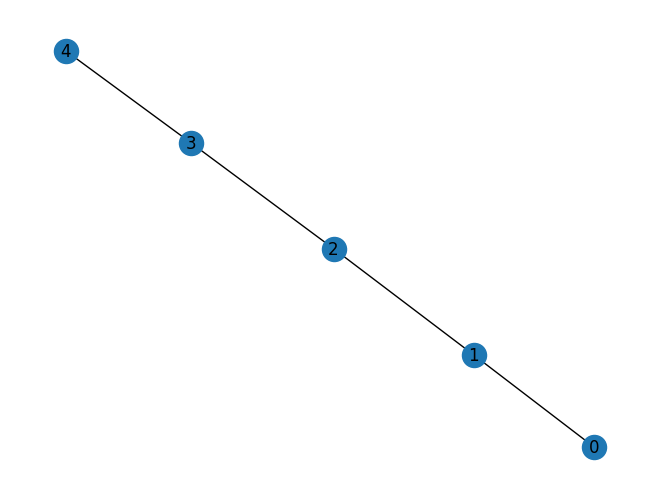

In [15]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (1, 2),
                   (2, 3),
                   (3, 4)])

nx.draw(G,with_labels = True)

closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)
#Sort for identifying most inflential nodes using closeness_centrality
#for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
#  print(node, closeness_centrality[node])

# 3. Betweenness centrality

In [12]:
betweenness_centrality = nx.betweenness_centrality(G)


In [13]:
#Sort for identifying most inflential nodes using betweenness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

4 0.43650793650793646
2 0.26984126984126977
3 0.25396825396825395
1 0.047619047619047616
7 0.047619047619047616
6 0.03968253968253967
5 0.0
8 0.0


# 4. Eigenvector centrality

If a node is pointed to by many nodes then that node will have high eigenvector centrality.

0 0.5163311132778224
3 0.4605589097129744
1 0.40781116737108153
5 0.3684701926326299
4 0.34608812874643025
2 0.18721071680314055
8 0.15382393197189426
6 0.14786314470285283
7 0.12548504820698178
9 0.05577442762250838


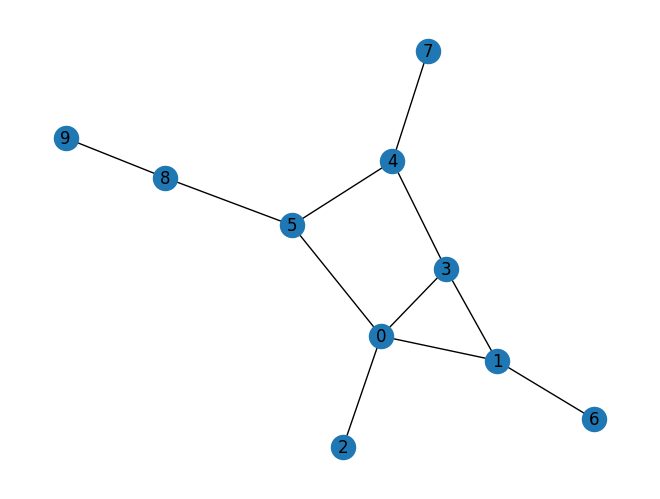

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
nx.draw(G, with_labels = True)
#Caculate eigenvector_centrality

eigenvector_centrality = nx.eigenvector_centrality(G)
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

# 5. Katz centrality

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
nx.draw(G, with_labels = True)
#Caculate kat_centrality

kat_centrality = nx.katz_centrality(G)

#Sort for identifying most inflential nodes using kat_centrality
for node in sorted(kat_centrality, key=kat_centrality.get, reverse=True):
  print(node, kat_centrality[node])


3 0.39837116164016045
2 0.3979957464558509
4 0.3912885477686667
1 0.3627994945952694
5 0.3266180854671848
6 0.32248848309558037
7 0.3218787410123867
8 0.28962990709484226


# 6. PageRank centrality

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
#Caculate pagerank

nx.pagerank(G,alpha=0.1)

{0: 0.10949439969135805,
 1: 0.10541496772119344,
 2: 0.09273734992283952,
 3: 0.09978650527263376,
 5: 0.10141741370884774,
 6: 0.09351382767489713,
 4: 0.10606037911522635,
 7: 0.09353532767489713,
 8: 0.1028950931069959,
 9: 0.09514473611111113}

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


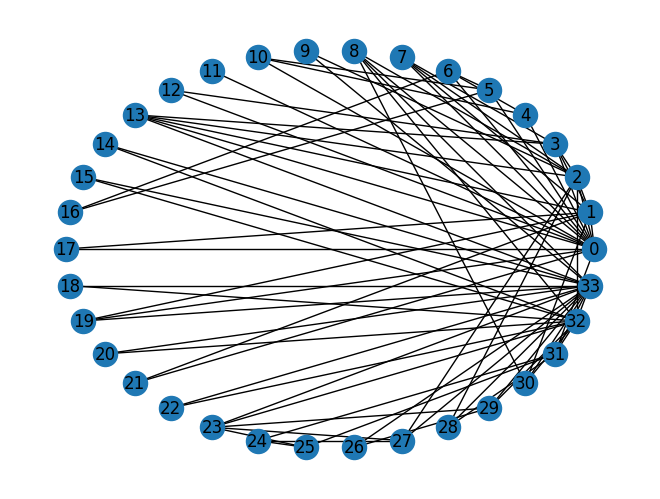

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()